## Упражнение 11

Применим сеточные методы для нахождения собственных значений ЗШЛ.
Домножим данное нам уравнение на -1, чтобы получить вид ЗШЛ. Тогда получим, что $p(r) = l (l + 1) r^{-2} - 2 r^{-1}$, $\lambda = -2E_{nl}$, $\rho(x) = 1$. Тогда матрица будет выглядеть примерно так:

$ \begin{pmatrix}
    - \frac{2}{h^2} - p_1 & \frac{1}{h^2} & 0 & 0 & 0\\
    \frac{1}{h^2} & - \frac{2}{h^2} - p_2 & \frac{1}{h^2} & 0 & 0\\
    0 & \frac{1}{h^2} & - \frac{2}{h^2} - p_3 & \frac{1}{h^2} & 0\\
    0 & 0 & \frac{1}{h^2} & \frac{2}{h^2} - p_4 & \frac{1}{h^2} \\
    0 & 0 & 0 & \frac{1}{h^2} & \frac{2}{h^2} - p_5 \\
  \end{pmatrix} $

In [5]:
import numpy as np
import pylab
import math

def net_method(l, N, R):
    h = R / N
    A = np.zeros((N - 1, N - 1))
    
    for i in range(0, N - 1):
        if (i - 1 >= 0):
            A[i][i - 1] = 1 / h ** 2
        A[i][i] = - 2 / h ** 2 - l * (l + 1) * ((i + 1) * h) ** (-2) + 2 * ((i + 1) * h) ** (-1)
        if (i + 1 <= N - 2):
            A[i][i + 1] = 1 / h ** 2
    
    w, v = np.linalg.eig(A)
    return w, v

Поймём, каким нужно выбрать N, чтобы погрешность была требуемой $\varepsilon = 10^{-5}$.

Асимптотика погрешности квадратичным образом зависит от длины шага, то есть $\varepsilon = O(h^2) = O(\frac{R^2}{N^2})$. Тогда $N = \sqrt{\frac{R^2}{\varepsilon}} = \sqrt{\frac{100}{10^{-5}}} = 10^{3.5} \approx 3162.3$.

Найдём 5 первых собственных чисел и проверим, что достигается нужная точность.

In [12]:
N = 7000
R = 100
eps = 10 ** (-5)

w, v = net_method(0, N, R)

pos = [x for x in w if x > 0]
first5_net = np.flip(np.sort(pos)[-5:], 0)
print(first5_net)

first5_real = [1 / ((n + 1) ** 2) for n in range(5)]
err = [abs(first5_net[i] - first5_real[i]) for i in range(5)]
print(eps - max(err))

[0.99994898 0.24999681 0.11111048 0.0624998  0.03999986]
-4.1015167416901265e-05


In [16]:
N = 10000
R = 100
eps = 10 ** (-5)

w, v = net_method(0, N, R)

pos = [x for x in w if x > 0]
first5_net = np.flip(np.sort(pos)[-5:], 0)
print(first5_net)

first5_real = [1 / ((n + 1) ** 2) for n in range(5)]
err = [abs(first5_net[i] - first5_real[i]) for i in range(5)]
print(eps - max(err))

[0.999975   0.24999844 0.1111108  0.0624999  0.0399999 ]
-1.4998612677906706e-05


In [17]:
print(max(err))

2.4998612677906706e-05


При ручной проверке не подошло N=4000, 5000 и даже 7000 (но погрешность имеет такой же порядок, что и у $\varepsilon$). Для N=10000 погрешность равна $2.4998612677906706e-05$. Остановимся на таком N. 

Построим графики для 5 первых собственных функций (сначала найдём их):

In [36]:
N = 10000
R = 100

h = R / N

def build_chart(vec, i):
    pylab.title("For lambda" + str(i))
    rs = [i * h for i in range(0, N + 1)]
    vec = np.insert(vec, 0, 0)
    vec = np.insert(vec, len(vec), 0)
    pylab.plot(rs, vec)
    
    pylab.show()

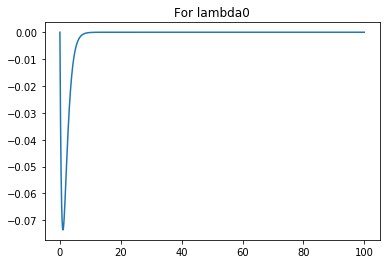

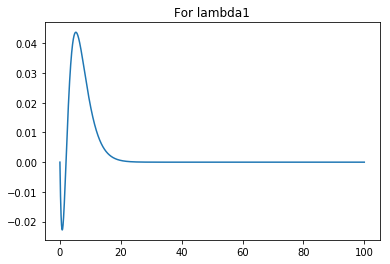

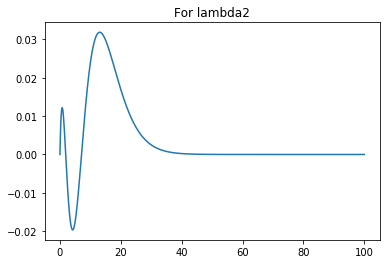

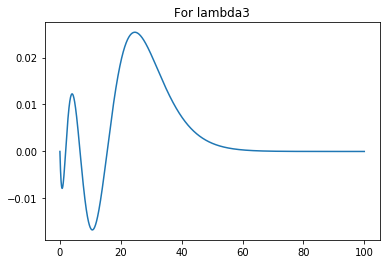

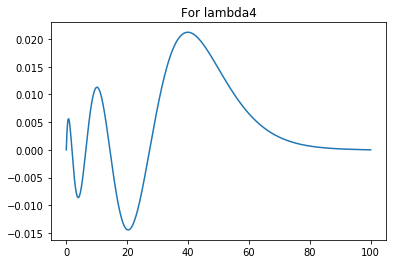

In [37]:
for i in range(5):     
    for j in range(len(w)):
        if first5_net[i] == w[j]:
            vec = v[:, j]
            build_chart(vec, i)

Теперь воспользуемся методом Нумерова.

In [10]:
def func_p(i, h, l):
    return l * (l + 1) * (i * h) ** (-2) - 2 * (i * h) ** (-1)

def numerov_method(l, N, R):
    h = R / N
    A = np.zeros((N - 1, N - 1))
    B = np.zeros((N - 1, N - 1))
    
    for i in range(0, N - 1):
        if (i - 1 >= 0):
            A[i][i - 1] = 1 / h ** 2 - func_p(i, h, l) / 12
        A[i][i] = - 2 / h ** 2 - 5 * func_p(i + 1, h, l) / 6
        if (i + 1 <= N - 2):
            A[i][i + 1] = 1 / h ** 2 - func_p(i + 2, h, l) / 12
    
    for i in range(0, N - 1):
        if (i - 1 >= 0):
            B[i][i - 1] = 1 / 12
        B[i][i] = 5 / 6
        if (i + 1 <= N - 2):
            B[i][i + 1] = 1 / 12
            
    return np.linalg.eig(np.linalg.inv(B) @ A)

In [11]:
N = 5000
R = 50
eps = 10 ** (-5)

w2, v2 = numerov_method(0, N, R)

pos2 = [x for x in w2 if x > 0]
first5_numerov = np.flip(np.sort(pos2)[-5:], 0)
print(first5_numerov)

first5_real = [1 / ((n + 1) ** 2) for n in range(5)]
err2 = [abs(first5_numerov[i] - first5_real[i]) for i in range(5)]
print(max(err2))

[0.99993401 0.24999175 0.11110865 0.06240763 0.03572866]
0.0042713413721463395


In [12]:
N = 5000
R = 50

h = R / N

def build_chart2(vec, i):
    pylab.title("For lambda" + str(i))
    rs = [i * h for i in range(0, N + 1)]
    vec = np.insert(vec, 0, 0)
    vec = np.insert(vec, len(vec), 0)
    pylab.plot(rs, vec)
    
    pylab.show()

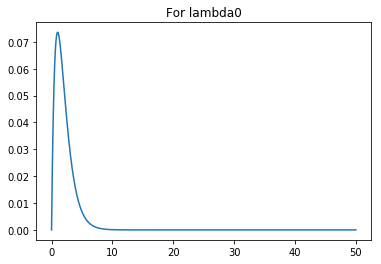

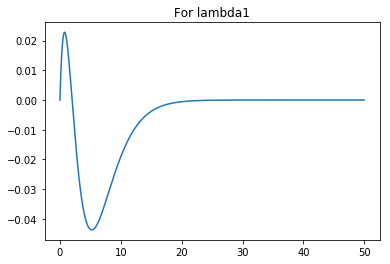

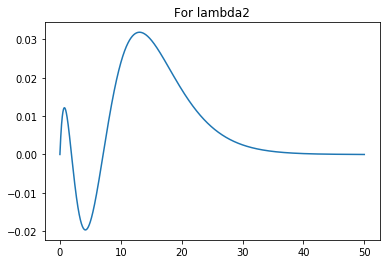

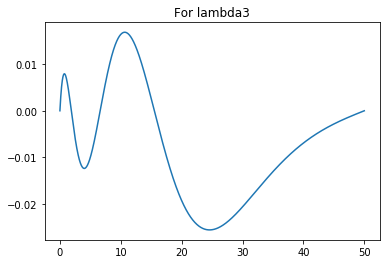

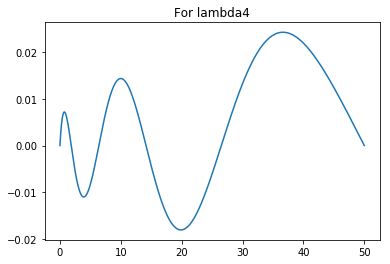

In [13]:
for i in range(5):     
    for j in range(len(w2)):
        if first5_numerov[i] == w2[j]:
            vec = v2[:, j]
            build_chart2(vec, i)

Построим графики погрешности для обоих методов.

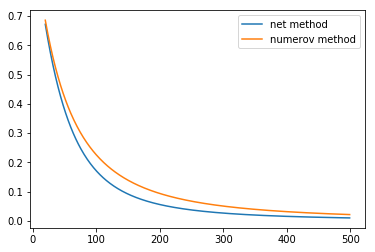

In [14]:
def err_net_method(N, R):
    w, v = net_method(0, N, R)

    pos = [x for x in w if x > 0]
    first5_net = np.flip(np.sort(pos)[-5:], 0)
    first5_real = [1 / ((n + 1) ** 2) for n in range(5)]
    err = [abs(first5_net[i] - first5_real[i]) for i in range(5)]
    return max(err)

def err_numerov_method(N, R):
    w2, v2 = numerov_method(0, N, R)

    pos2 = [x for x in w2 if x > 0]
    first5_numerov = np.flip(np.sort(pos2)[-5:], 0)
    first5_real = [1 / ((n + 1) ** 2) for n in range(5)]
    err2 = [abs(first5_numerov[i] - first5_real[i]) for i in range(5)]
    return max(err2)

Ns = [i for i in range(20, 500)]

err_net = [err_net_method(i, 100) for i in Ns]
err_numerov = [err_numerov_method(i, 100) for i in Ns]

pylab.plot(Ns, err_net, label="net method")
pylab.plot(Ns, err_numerov, label="numerov method")

pylab.legend()
pylab.show()